# Lecture worksheet 18 solutions

### Reminder: Only problem 1 is graded for credit, all other problems are optional (but still recommended)

## Problem 1: 

1a) What is the environment of a bandit problem?

**Solution:** It is the collection of reward distributions $P_a$ for each arm $1 \leq a \leq K$.

1b) As the learner interacts with environment over $n$ rounds, we get a sequence of data $A_1,X_1,A_2,X_2,\ldots,A_n,X_n$. What do $A_t$ and $X_t$ denote?

**Solution:** $A_t$ is the arm chosen in round $t$, $X_t$ is the reward observed in round $t$.

1c) What do we assume about the arm reward distribution $P_a$?

**Solution:** We assume that it is 1-sub-Gaussian.

1d) Write out the formulas for the following symbols: $T_a(t), \mu_a, \hat{\mu}_a(t), R_n$.

**Solution:**
$$T_a(t) = \sum_{s=1}^t 1(A_s = a)$$
$$\mu_a = \mathbb{E}_{Z~P_a}[Z]$$
$$\hat{\mu}_a(t) = \frac{1}{T_a(t)} \sum_{s=1}^t X_s 1(A_s = a)$$
$$R_n = n\mu^* - \mathbb{E}[\sum_{t=1}^nX_{A_t}]$$

1e) Explain in words what the difference is between regret and pseudo-regret.

**Solution:** The pseudo regret is given by
$$\bar{R}_n = n\mu^* - \sum_{t=1}^N \mu_{A_t}$$
Hence, it conditions on the choices of the arms at each step $t$. It compares the cumulative expected reward from the optimal arm against that of a determintic sequence of arm choices. On the other hand, the regret of a policy also takes an expectation over the randomness in the arm choices at each step.

1f) Write pseudo-code for the Explore-then-Commit algorithm.

**Solution:**
$$
A_t = \begin{cases}
(t ~\text{mod}~ K) + 1 & \quad \text{if}~ t \leq mK \\
\arg\max_a \hat{\mu}_a(mK) & \quad \text{if}~ t > mK.
\end{cases}
$$

## Problem 2 (confidence intervals from Hoeffding):

a) Suppose that $Z$ is a $\sigma$-sub-Gaussian random variable with mean $\mu$. Prove that $\mathbb{P}(Z \geq \mu + \sigma\sqrt{2\log(1/\delta)}) \leq \delta$.

**Solution:** By Hoeffding for sub-Gaussian RVs, we have
$$\mathbb{P}(Z - \mu \geq t) \leq \exp(-\frac{t^2}{2\sigma^2})$$
We now set the right-hand-side to be equal to $\delta$ and solve for $t$.

b) Using the above or otherwise, show that if $Z_1,\ldots,Z_n$ are independent 1-sub-Gaussian random variables each with mean $\mu$, then $S_n = \frac{1}{n}\sum_{i=1}^n Z_i$ satisfies
$$\mathbb{P}\left(S_n \geq \mu + \sqrt{\frac{2\log(1/\delta)}{n}} \right) \leq \delta$$

**Solution:** By the two lemmas at the end of Section 9 in the [lecture notes](http://data102.datahub.berkeley.edu/hub/user-redirect/git-sync?repo=https://github.com/ds-102/sp21&subPath=lecture/lecture17/concentration.ipynb), $S_n$ is $\sigma$-sub-Gaussian with $\sigma^2 = \frac{1}{n}$.

## Problem 3 (a deeper look at ETC):

a) For a fixed time horizon $n$, suppose we run ETC with different values of $m$. Without coding anything, predict how the graph of regret $R_n$ against $m$ would look like.

**Solution:** It would be a $U$-shaped curve. $m$ conveys how much we explore. Exploring too little or too much is both bad.

b) Predict how the regret $R_n$ of ETC (with fixed $m$) would change if we decrease the suboptimality gap $\Delta_a$ for each arm. Would the regret for the UCB algorithm behave in the same way?

**Solution:** We work with a fixed time horizon $n$. If $\Delta_a$ is small, then there is a larger chance of choosing a suboptimal arm, but the price paid for choosing a suboptimal arm is smaller. If $\Delta_a$ is big, then we almost always choose the optimal arm, but we have to pay a larger price in the exploration phase. Hence, we anticipate that the graph will look bell-shaped. The graph for UCB should be similar.

c) Predict how the regret $R_n$ of ETC (with fixed $m$) would change if we increase the number of arms $K$.

**Solution:** $R_n$ would increase.

d) (*optional*) Verify the above using the bandits widget provided at the bottom of this notebook.

## Problem 4 (biasedness of observed reward means):

Your friend Bob has been playing around with the bandits widget and noticed something curious happening: Over many simulations, the average reward observed for the suboptimal arms tend to be systematically *below* the true reward means. Try this out for yourself if you don't believe it. Can you explain why this is the case? 

**Solution:** First, note that $T_a(t)$ is itself a random variable, and is dependent on the rewards observed for arm $a$. This means that
$$
\mathbb{E}[\hat \mu_{a}(t)] = \mathbb{E}\left[ \frac{1}{T_a(t)}\sum_{s=1}^t X_s 1(A_s=a)\right] \neq \mu_a
$$

If the rewards we have observed for arm $a$ are smaller than normal, then we are less likely than normal to pull arm $a$ on future rounds. This intuition tells us that $\hat{\mu}_a$ for suboptimal arms are biased downward.

It's quite difficult to make this intuition mathematically rigorous, and this is a topic of current research.

### Simulations for Problem 3 and 4: UCB code is omitted

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import matplotlib.animation as ani
from matplotlib.widgets import Button
import functools
from Bandit_env import BanditEnvb
# from UCB import UCB_pull_arm 

### Regret vs $m$

In [2]:
# TODO: complete the function
def ETC_pull_arm(t, m, rewards):
    """ Implement the choice of arm for the ETC algorithm
    
    Inputs:
        t : int, current iteration
        m: parameter for ETC, exploration phase duration
        rewards: a list of K lists. Each of the K lists holds the samples received from
            pulling each arm up to iteration t. 

    Outputs:
        arm: an integer representing the arm that the UCB algorithm would choose.
    """

    K = len(rewards)
    
    if t < m*K:
        arm = t % K
    else:
        arms = np.arange(K)
        mean_rewards = [np.mean(rewards[arm][:m]) for arm in arms]
        arm = np.argmax(mean_rewards)
    
    return arm

In [73]:
m_vals = np.arange(2,15)

Delta = 1
num_arms = 5
means = [10] + [10-Delta] * (num_arms-1)
standard_deviations=[1 for arm in range(len(means))]
bandit_env=BanditEnv(means, standard_deviations)

# Define the time horizon of each run, and the number of runs of each the algorithm.
T = 100
num_runs=200

regrets = []
for m in m_vals:
    #Initialize pseudo-regret
    ETC_pseudo_regret=0
    for runs in range(num_runs):
        #Initialize Bandit_environment
        bandit_env.initialize(make_plot=0)
        for t in range(1,T+1):
            #Choose arm using ETC algorithm
            arm = ETC_pull_arm(t, m, bandit_env.rewards)

            #Pull Arm
            bandit_env.pull_arm(arm)

        #Keep track of pseudo-regret  
        ETC_pseudo_regret+=np.array(bandit_env.regret)
    regrets.append(ETC_pseudo_regret[-1] / num_runs)

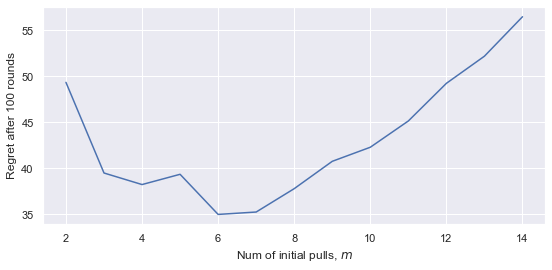

In [75]:
plt.figure()
plt.plot(m_vals, regrets)
plt.xlabel("Num of initial pulls, $m$")
plt.ylabel("Regret after 100 rounds")
plt.show()

### Regret vs $K$

In [69]:
num_arms_vals = np.arange(5,10)

# Globals
m = 5
Delta = 1

# Define the time horizon of each run, and the number of runs of each the algorithm.
T = 100
num_runs=200

regrets = []
for num_arms in num_arms_vals:
    #Initialize pseudo-regret
    ETC_pseudo_regret=0
    
    means = [10] + [10-Delta] * (num_arms-1)
    standard_deviations=[1 for arm in range(len(means))]
    bandit_env=BanditEnv(means, standard_deviations)
    
    for runs in range(num_runs):
        #Initialize Bandit_environment
        bandit_env.initialize(make_plot=0)
        for t in range(1,T+1):
            #Choose arm using ETC algorithm
            arm = ETC_pull_arm(t, m, bandit_env.rewards)

            #Pull Arm
            bandit_env.pull_arm(arm)

        #Keep track of pseudo-regret  
        ETC_pseudo_regret+=np.array(bandit_env.regret)
    regrets.append(ETC_pseudo_regret[-1] / num_runs)

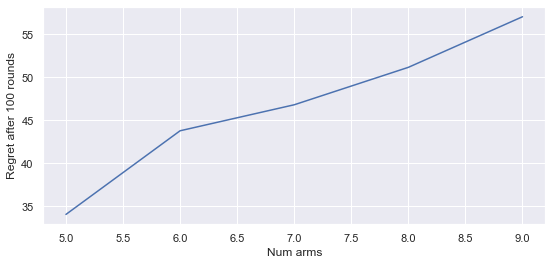

In [72]:
plt.figure()
plt.plot(num_arms_vals, regrets)
plt.xlabel("Num arms")
plt.ylabel("Regret after 100 rounds")
plt.show()

### Regret vs $\Delta$

In [10]:
Delta_vals = np.linspace(0.2, 2, 10)

# Globals
m = 5
num_arms = 5

# Define the time horizon of each run, and the number of runs of each the algorithm.
T = 500
num_runs = 200

regrets = []
for Delta in Delta_vals:
    #Initialize pseudo-regret
    ETC_pseudo_regret=0
    
    means = [10] + [10-Delta] * (num_arms-1)
    standard_deviations=[1 for arm in range(len(means))]
    bandit_env=BanditEnv(means, standard_deviations)
    
    for runs in range(num_runs):
        #Initialize Bandit_environment
        bandit_env.initialize(make_plot=0)
        for t in range(1,T+1):
            #Choose arm using ETC algorithm
            arm = ETC_pull_arm(t, m, bandit_env.rewards)

            #Pull Arm
            bandit_env.pull_arm(arm)

        #Keep track of pseudo-regret  
        ETC_pseudo_regret+=np.array(bandit_env.regret)
    regrets.append(ETC_pseudo_regret[-1] / num_runs)

In [11]:
Delta_vals = np.linspace(0.2, 2, 10)

# Globals
delta = 1 / T**2

UCB_regrets = []
for Delta in Delta_vals:
    #Initialize pseudo-regret
    UCB_pseudo_regret=0
    
    means = [10] + [10-Delta] * (num_arms-1)
    standard_deviations=[1 for arm in range(len(means))]
    bandit_env=BanditEnv(means, standard_deviations)
    
    for runs in range(num_runs):
        #Initialize Bandit_environment
        bandit_env.initialize(make_plot=0)
        
        for t in range(1,T+1):
            #Choose arm using UCB algorithm
            arm, _ = UCB_pull_arm(t, standard_deviations, bandit_env.times_pulled,bandit_env.rewards)

            #Pull Arm
            bandit_env.pull_arm(arm)

        #Keep track of pseudo-regret  
        UCB_pseudo_regret+=np.array(bandit_env.regret)
    UCB_regrets.append(UCB_pseudo_regret[-1] / num_runs)

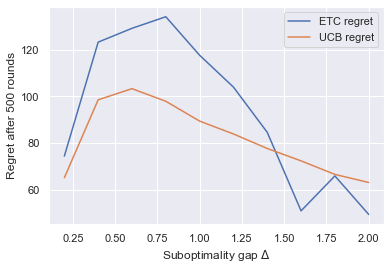

In [12]:
plt.figure()
plt.plot(Delta_vals, regrets, label="ETC regret")
plt.plot(Delta_vals, UCB_regrets, label="UCB regret")
plt.xlabel("Suboptimality gap $\Delta$")
plt.ylabel("Regret after 500 rounds")
plt.legend()
plt.show()

### Biasedness of observed rewards

In [26]:
# Globals
delta = 1 / T**2
Delta = 1
num_arms = 5
T = 500
num_runs = 1000
    
means = [10] + [10-Delta] * (num_arms-1)
standard_deviations=[1 for arm in range(len(means))]
bandit_env=BanditEnv(means, standard_deviations)

below_true_mean = []
for runs in range(num_runs):
    #Initialize Bandit_environment
    bandit_env.initialize(make_plot=0)

    for t in range(1,T+1):
        #Choose arm using UCB algorithm
        arm, _ = UCB_pull_arm(t, standard_deviations, bandit_env.times_pulled,bandit_env.rewards)

        #Pull Arm
        bandit_env.pull_arm(arm)

    for a in range(1,num_arms):
        below_true_mean.append(np.mean(bandit_env.rewards[a]) < 10 - Delta)
    
below_true_mean = np.mean(below_true_mean)

In [27]:
below_true_mean

0.55925

This is the proportion of times where a suboptimal arm had observed mean less than the true mean. If the observed means were unbiased, then this number should be close to 0.5.